Assignment:

1.ecommerce sales analysis:

an online store in flipkart wants to understand daily sales variation
take 30 days of the sales

tasks:

calculate mean,median,mode

calculate std and var

calculate correlation

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

dates = pd.date_range(start="2024-01-01", periods=30)

data = {
    "Date": dates,
    "Orders": np.random.randint(50, 200, 30),
    "Revenue": np.random.randint(5000, 20000, 30)
}

df = pd.DataFrame(data)

df.head()

,Date,Orders,Revenue
0,2024-01-01,152,6267
1,2024-01-02,142,6528
2,2024-01-03,64,16394
3,2024-01-04,156,8556
4,2024-01-05,121,8890


In [3]:
df

,Date,Orders,Revenue
0,2024-01-01,152,6267
1,2024-01-02,142,6528
2,2024-01-03,64,16394
3,2024-01-04,156,8556
4,2024-01-05,121,8890
5,2024-01-06,70,13838
6,2024-01-07,152,19356
7,2024-01-08,171,16080
8,2024-01-09,124,19502
9,2024-01-10,137,10393


In [2]:
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode(numeric_only=True))

Mean:
 Orders       123.633333
Revenue    13247.333333
dtype: float64

Median:
 Orders       130.5
Revenue    13815.0
dtype: float64

Mode:
     Orders  Revenue
0     64.0     5775
1     70.0     6267
2    137.0     6528
3    152.0     7612
4      NaN     8556
5      NaN     8890
6      NaN    10393
7      NaN    10486
8      NaN    11235
9      NaN    12041
10     NaN    12099
11     NaN    12513
12     NaN    13226
13     NaN    13433
14     NaN    13792
15     NaN    13838
16     NaN    14555
17     NaN    14670
18     NaN    15233
19     NaN    15253
20     NaN    15555
21     NaN    15627
22     NaN    15748
23     NaN    16016
24     NaN    16080
25     NaN    16394
26     NaN    17206
27     NaN    19356
28     NaN    19502
29     NaN    19541


In [4]:
print("Standard Deviation:\n", df.std(numeric_only=True))
print("\nVariance:\n", df.var(numeric_only=True))

Standard Deviation:
 Orders       40.253064
Revenue    3861.960770
dtype: float64

Variance:
 Orders     1.620309e+03
Revenue    1.491474e+07
dtype: float64


In [5]:
correlation = df.corr(numeric_only=True)
print("Correlation:\n", correlation)

Correlation:
            Orders   Revenue
Orders   1.000000  0.006676
Revenue  0.006676  1.000000


2.salary distribution:
we need to check salary related insights

tasks:

calculate quartiles

plot boxplot to check the outliers

interpret on income on the inequality

In [8]:
df["Salary"].describe()

,Salary
count,100.000000
mean,72368.890000
std,28730.338066
min,20769.000000
25%,47934.250000
50%,78018.000000
75%,96619.000000
max,119299.000000


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

salaries = np.random.randint(20000, 120000, 100)

df = pd.DataFrame({"Salary": salaries})

df.head()

,Salary
0,35795
1,20860
2,96820
3,74886
4,26265


In [7]:
q1 = df["Salary"].quantile(0.25)
q2 = df["Salary"].quantile(0.50)
q3 = df["Salary"].quantile(0.75)

print("Q1:", q1)
print("Median (Q2):", q2)
print("Q3:", q3)

Q1: 47934.25
Median (Q2): 78018.0
Q3: 96619.0


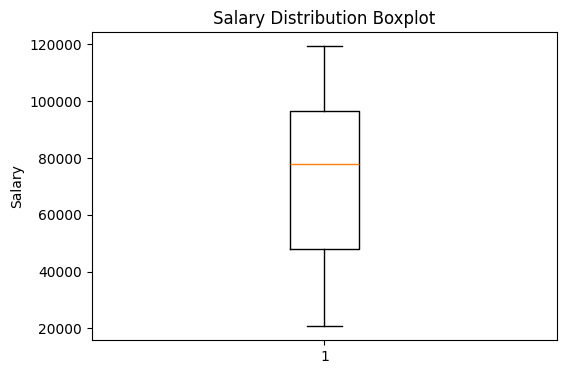

In [9]:
plt.figure(figsize=(6,4))
plt.boxplot(df["Salary"])
plt.title("Salary Distribution Boxplot")
plt.ylabel("Salary")
plt.show()

In [10]:
iqr = q3 - q1
print("IQR:", iqr)

IQR: 48684.75


The salary distribution shows moderate inequality, with a few high-income outliers indicating that a small group of employees earn significantly more than the majority.

3.hospital waiting time

A hospital recorded patient waiting time

tasks:

find the variance and range

identify skewness

detect the outlier if any by using IQR

In [11]:
import pandas as pd
import numpy as np

np.random.seed(42)

waiting_time = np.random.randint(5, 120, 50)

df = pd.DataFrame({"Waiting_Time": waiting_time})

df.head()

,Waiting_Time
0,107
1,56
2,97
3,19
4,111


In [12]:
variance = df["Waiting_Time"].var()
print("Variance:", variance)

Variance: 989.1122448979592


In [13]:
range_value = df["Waiting_Time"].max() - df["Waiting_Time"].min()
print("Range:", range_value)

Range: 106


In [14]:
skewness = df["Waiting_Time"].skew()
print("Skewness:", skewness)

Skewness: -0.24347782862068865


In [16]:
q1 = df["Waiting_Time"].quantile(0.25)
q3 = df["Waiting_Time"].quantile(0.75)

iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

outliers = df[(df["Waiting_Time"] < lower_limit) | (df["Waiting_Time"] > upper_limit)]

print("Outliers:\n", outliers)


Outliers:
 Empty DataFrame
Columns: [Waiting_Time]
Index: []
